In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from dotenv import load_dotenv
load_dotenv("../.env")
DATASET_PATH=os.getenv("DATASET_DIRECTORY")
DATASET_PATH=os.path.join("/data/radnav/radnav_model_datasets")
MODEL_TRAINING_DATASET_PATH=os.getenv("MODEL_TRAINING_DATASET_PATH")
GENERATED_DATASETS_PATH=os.getenv("GENERATED_DATASETS_PATH")


sys.path.append("../")
from cpsl_datasets.gnn_node_ds import GnnNodeDS

from mmwave_model_integrator.input_encoders._node_encoder import _NodeEncoder
from mmwave_model_integrator.ground_truth_encoders._gt_node_encoder import _GTNodeEncoder
from mmwave_model_integrator.plotting.plotter_gnn_pc_processing import PlotterGnnPCProcessing


In [2]:
#initialize the dataset
config_label = "IcaRAus_gnn_100fh"

dataset_path = os.path.join(DATASET_PATH,"{}_train".format(config_label))
dataset = GnnNodeDS(
    dataset_path=dataset_path,
    node_folder="nodes",
    label_folder="labels"
)
print(dataset_path)

found 7201 node samples
found 7201 label samples
/data/radnav/radnav_model_datasets/IcaRAus_gnn_100fh_train


In [3]:
#initialize the encoder and decoder
input_encoder = _NodeEncoder()
ground_truth_encoder = _GTNodeEncoder()
plotter = PlotterGnnPCProcessing()

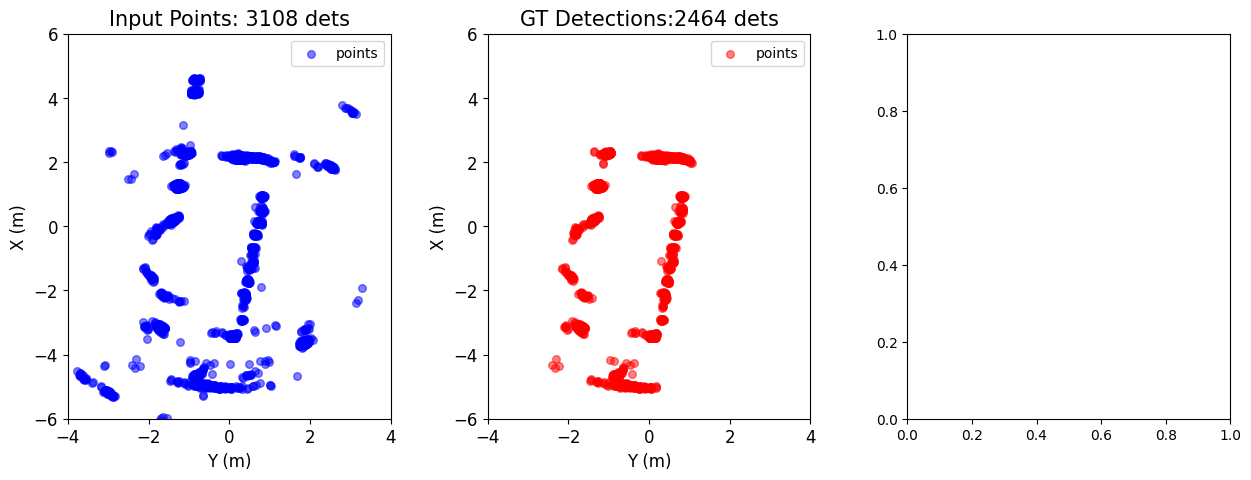

In [4]:
#plot a sample from the training dataset
idx=2000
nodes = dataset.get_node_data(idx=idx)
labels = dataset.get_label_data(idx=idx)

plotter.plot_compilation(
    input_data=nodes,
    gt_data=labels,
    input_encoder=input_encoder,
    ground_truth_encoder=ground_truth_encoder,
    show=True
)

In [5]:
from mmwave_model_integrator.config import Config
import mmwave_model_integrator.torch_training.trainers as trainers

# config_path = "../configs/RaGNNarok/RaGNNarok_uav.py"
config_path = "../configs/IcaRAus_gnn_base.py"
config = Config(config_path)

config.print_config()

trainer_config = config.trainer
trainer_class = getattr(trainers,trainer_config.pop('type'))
trainer = trainer_class(**trainer_config)

model=dict(
    type=RadarDynamicClassifier,
    in_channels=4,
    hidden_channels=32,
    out_channels=1,
    k=20,
),
config_label=IcaRAus_gnn_100fh,
generated_dataset=dict(
    input_encoding_folder=nodes,
    ground_truth_encoding_folder=labels,
    generated_dataset_path=/data/radnav/radnav_model_datasets/IcaRAus_gnn_100fh_train,
),
trainer=dict(
    type=GNNTorchTrainer,
    model=dict(
        type=RadarDynamicClassifier,
        in_channels=4,
        hidden_channels=32,
        out_channels=1,
        k=20,
    ),
    optimizer=dict(
        type=Adam,
        lr=0.001,
    ),
    loss_fn=dict(
        type=BCEWithLogitsLoss,
    ),
    dataset=dict(
        type=_GnnNodeDataset,
        edge_radius=10.0,
        transforms=[],
        enable_edge_attr=False,
        enable_edge_index=False,
        enable_random_yaw_rotate=True,
        enable_occupancy_grid_preturbations=False,
        enable_node_value_preturbations=True,
        node_value_preturbation_sigma=0.05,
       

In [6]:
trainer.train_model()

ModelTrainer.train: training the network...


  0%|          | 0/13 [00:00<?, ?it/s]/home/david/.cache/pypoetry/virtualenvs/odometry-JJ4jnFPp-py3.12/lib/python3.12/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)
  0%|          | 0/13 [00:03<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 754.00 MiB. GPU 0 has a total capacity of 7.78 GiB of which 727.75 MiB is free. Including non-PyTorch memory, this process has 6.60 GiB memory in use. Of the allocated memory 5.52 GiB is allocated by PyTorch, and 1022.57 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)